# Imports

In [1]:
# ============================================================
# Core scientific stack
# ============================================================
import numpy as np
import matplotlib.pyplot as plt


# ============================================================
# circle_bundles core API
# ============================================================
from circle_bundles.api import build_bundle


# ============================================================
# Local analysis utilities
# ============================================================
from circle_bundles.analysis.local_analysis import (
    get_local_rips,
    plot_local_rips,
)


# ============================================================
# Local circular coordinates (optional)
# ============================================================
from dreimac import CircularCoords


# ============================================================
# Cover constructions
# ============================================================
from circle_bundles.covers.triangle_cover_builders_fibonacci import (
    make_s2_fibonacci_star_cover,
)


# ============================================================
# Synthetic S³ / SO(3) data generation and projections
# ============================================================
from circle_bundles.synthetic.s2_bundles import (
    sample_sphere,
    hopf_projection,
    spin3_adjoint_to_so3,
    so3_to_s2_projection,
)


In this notebook, we consider samplings from the total spaces of two well-known and related circle bundles over $\mathbb{S}^{2}$:

$\textbf{1.}$ Given a vector $v\in\mathbb{S}^{2}$, we define a Hopf projection map $\pi:\mathbb{S}^{3}\to \mathbb{S}^{2}$ by $\pi (q) = qvq^{-1}$, where $\mathbb{S}^{2}$ is identified with the pure imaginary quaternions in $\mathbb{H}\cong\mathbb{S}^{3}$. One can show that this map is an orientable circle bundle with Euler number $\pm 1$ (note that Euler number is only defined up to sign for arbitrary circle bundles). 

$\textbf{2.}$ Similarly, we define a projection map $\widetilde{\pi}:SO(3)\to \mathbb{S}^{2}$ by $\widetilde{\pi}(A) = Av$. This map is related to $\pi$ via the adjoint map $\text{Adj}:\mathbb{S}^{3}\to SO(3)$ given by $\text{Adj}_{q}(v) = qvq^{-1}$.  In particular, we have $\widetilde{\pi}\circ \text{Adj} = \pi$, and one can show that $\widetilde{\pi}$ is an orientable circle bundle with Euler number $\pm 2$.  

The goal of this notebook is to use our circle bundle analysis pipeline to recover the global structure underlying each dataset. 

# Hopf Bundle Over $\mathbb{S}^{2}$

In [2]:
# --- Generate a sampling of S3 ---

n_samples = 5000
rng = np.random.default_rng(0)
s3_data = sample_sphere(n_samples,3, rng=rng)


print(f"Generated {n_samples} samples of S3, represented as 4D-vectors.")

Generated 5000 samples of S3, represented as 4D-vectors.


In [3]:
# --- Compute base projections ---

v = np.array([1.0, 0.0, 0.0])
base_points = hopf_projection(s3_data, v = v)

print("Base projections to S2 computed using a version of the Hopf map.")


Base projections to S2 computed using a version of the Hopf map.


### Cover And Nerve Summary
- $n_\text{sets} = 60$, $n_\text{samples} = 5000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 60$
- $\#(\text{1-simplices}) = 174$
- $\#(\text{2-simplices}) = 116$
- *No recorded simplices in dimensions* $\ge 3$

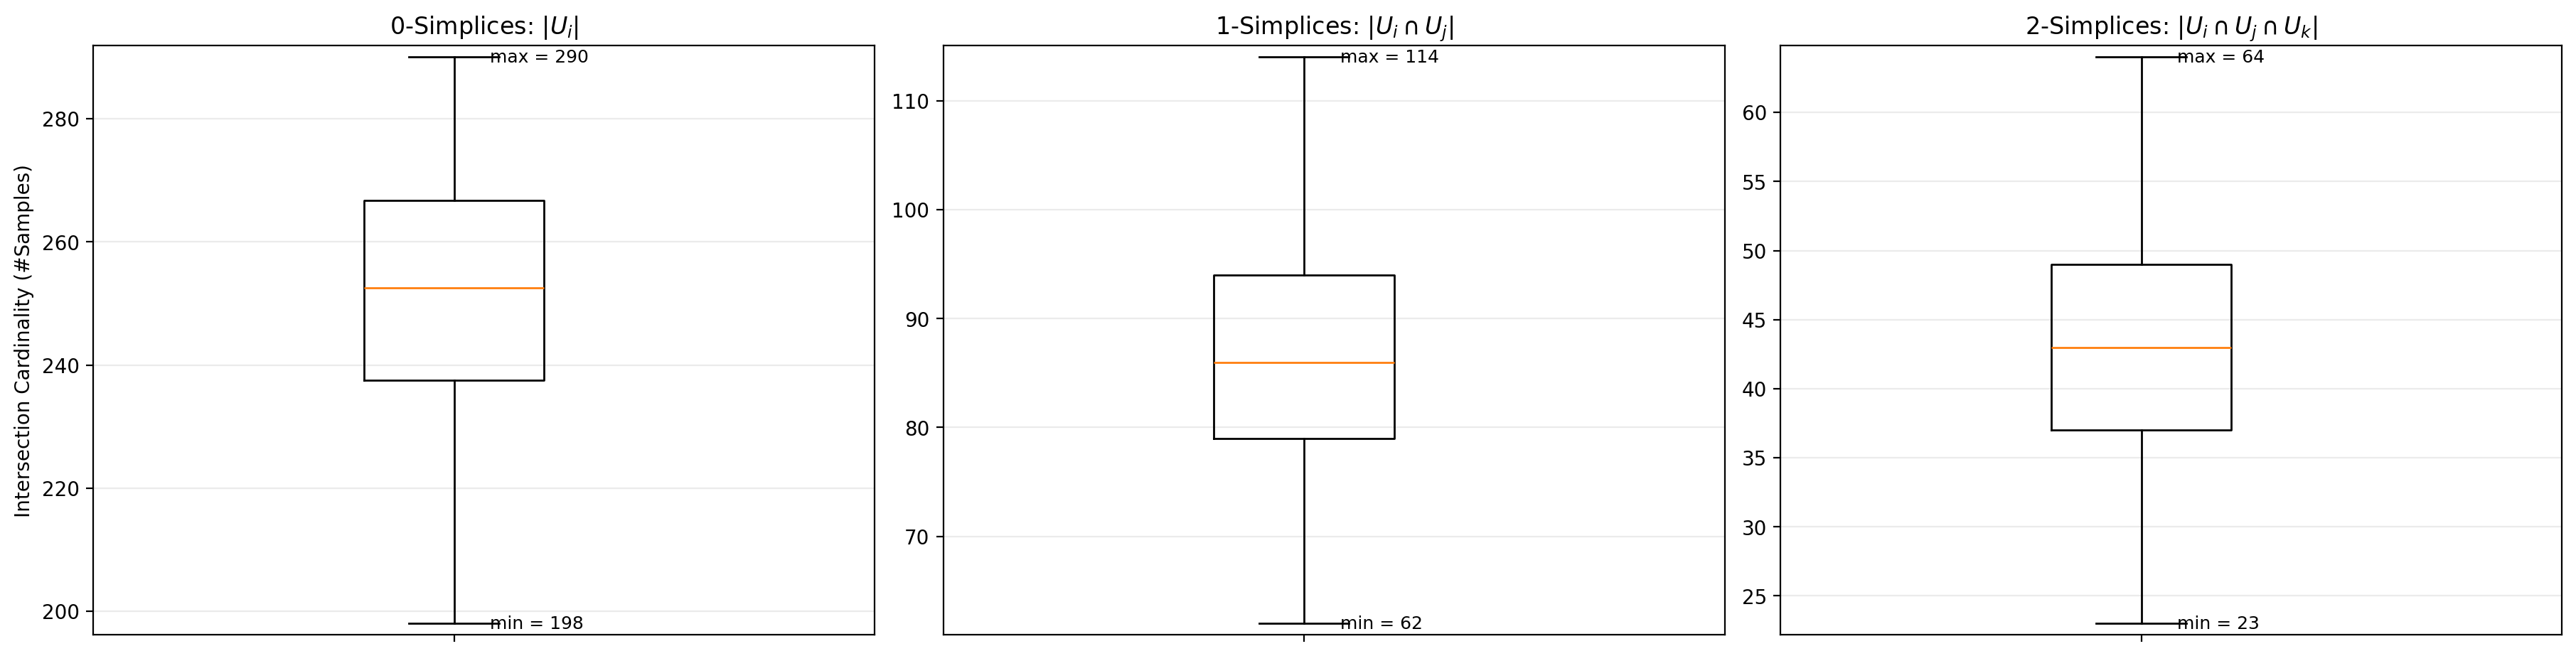

In [4]:
# --- Construct an open cover of S2 ---

n_landmarks = 60
s2_cover = make_s2_fibonacci_star_cover(base_points, n_vertices = n_landmarks)

summ = s2_cover.summarize(plot = True)

Compute persistent homology on the data in each $\pi^{-1}(U_{j})$ to verify the presence of a single strong 1-D persistent (circular) feature

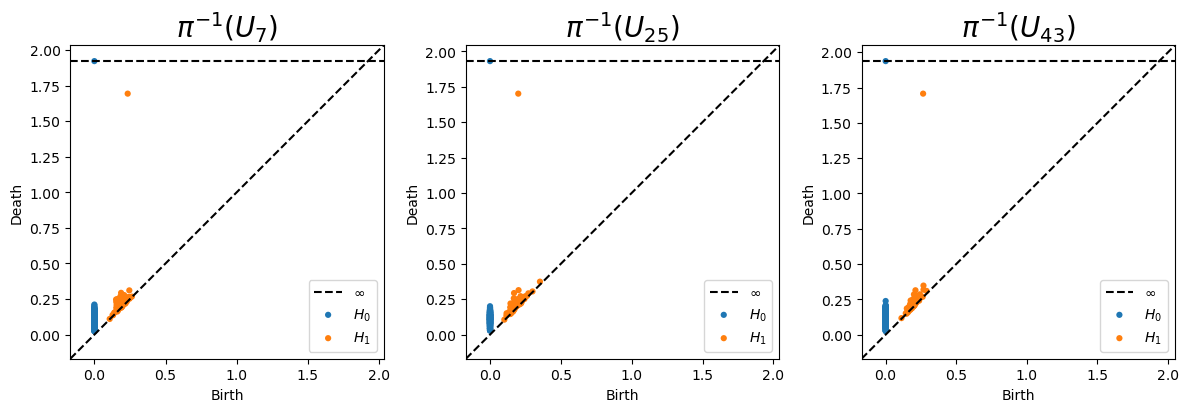

In [5]:
fiber_ids, dense_idx_list, rips_list = get_local_rips(
    s3_data,
    s2_cover.U,
    to_view = [7,25,43],
    maxdim=1,
    n_perm=500,
    random_state=None,
)

fig, axes = plot_local_rips(
    fiber_ids,
    rips_list,
    n_cols=3,
    titles='default',
    font_size=20,
)

$\textbf{Main bundle computation}:$ Compute local circular coordinates on each $\pi^{-1}(U_{j})$ and construct approximate transition matrices $\Omega_{jk}\in O(2)$ using Procrustes analysis.  Compute orientation and Euler class cocycle representatives and determine the classification of the global bundle structure. 

In [6]:
s3_bundle = build_bundle(
    s3_data,
    s2_cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
)


<IPython.core.display.Math object>

# SO(3) As A Circle Bundle Over $\mathbb{S}^{2}$

Use the adjoint map to construct (flattened) $SO(3)$ matrices from the samples in $\mathbb{S}^{3}$

In [7]:
so3_data = spin3_adjoint_to_so3(s3_data)
print("Flattened SO(3) matrices computed.")

Flattened SO(3) matrices computed.


In [9]:
# --- Sanity check: verify the so3 matrices have the same s2 projections as the s3 samples ---

so3_base_points = so3_to_s2_projection(so3_data, v= v)

print(f"Projections agree: {np.allclose(so3_base_points, base_points)}")

Projections agree: True


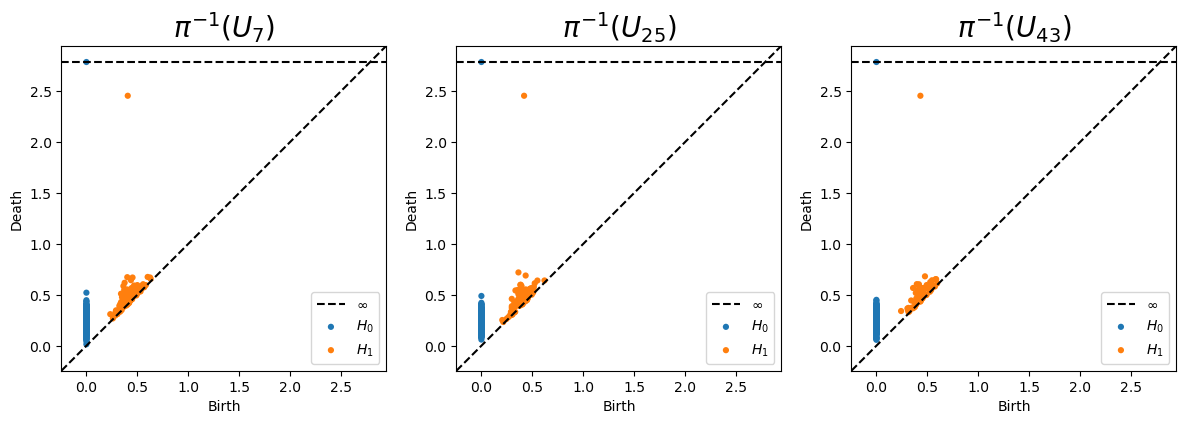

In [10]:
# --- Run persistence on open sets to check for local circular features ---

fiber_ids, dense_idx_list, rips_list = get_local_rips(
    so3_data,
    s2_cover.U,
    to_view = [7,25,43],
    maxdim=1,
    n_perm=500,
    random_state=None,
)

fig, axes = plot_local_rips(
    fiber_ids,
    rips_list,
    n_cols=3,
    titles='default',
    font_size=20,
)

In [11]:
# --- Main bundle computation ---

so3_bundle = build_bundle(
    so3_data,
    s2_cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
)


<IPython.core.display.Math object>